<a href="https://colab.research.google.com/github/gibiee/Measure_BoneAge/blob/master/%EB%BC%88%20%EB%82%98%EC%9D%B4%20%EC%B8%A1%EC%A0%95(%EB%A0%88%EC%9D%B4%EC%96%B4%20%ED%95%A9%EC%84%B1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 레이어 합성 간단한 예제

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            20          input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 3)            18          dense[0][0]                      
_______________________________________________________________________________________

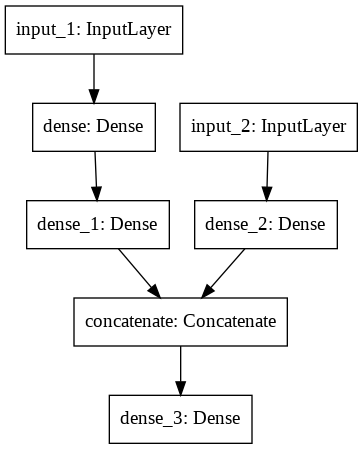

In [ ]:
import tensorflow as tf

input1 = tf.keras.layers.Input(shape=(3,))
n1 = tf.keras.layers.Dense(5, activation='relu')(input1)
n2 = tf.keras.layers.Dense(3, activation='relu')(n1)

input2 = tf.keras.layers.Input(shape=(2,))
n3 = tf.keras.layers.Dense(1, activation='linear')(input2)

concat = tf.keras.layers.concatenate([n2, n3])
output = tf.keras.layers.Dense(3)(concat)

model = tf.keras.models.Model(inputs=[input1, input2], outputs=output)
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
import numpy as np

x1 = np.array([[1,2,3],
               [4,5,6],
               [7,8,9]])
x2 = np.array([[1,0],
               [0,1],
               [1,0]])

y = np.array([[10],
              [20],
              [30]])

In [ ]:
model.compile(loss='mse', optimizer='adam')
model.fit([x1,x2], y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 472.4013
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 472.2869
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 472.1720
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 472.0568
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 471.9413


# InceptionV3에 붙이기

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inception_v3_input (InputLayer) [(None, 224, 224, 1) 0                                            
__________________________________________________________________________________________________
inception_v3 (Functional)       (None, 5, 5, 2048)   21802208    inception_v3_input[0][0]         
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           inception_v3[0][0]               
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 2)]          0                                            
_______________________________________________________________________________________

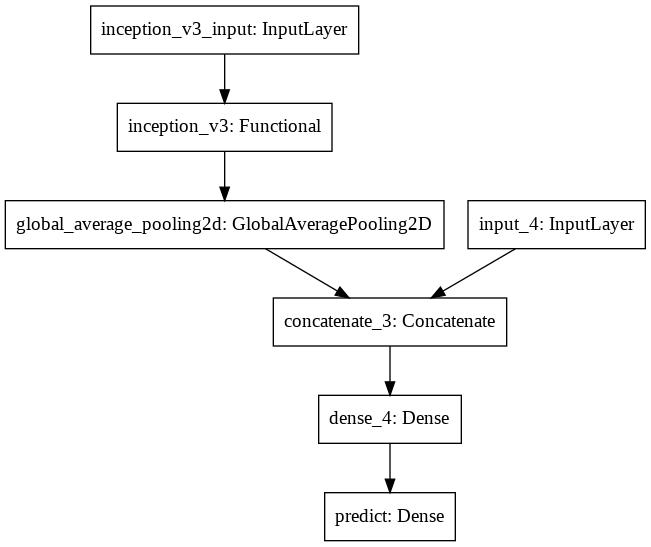

In [ ]:
import tensorflow as tf

base_model = tf.keras.Sequential([
                                  tf.keras.applications.InceptionV3(weights=None, include_top=False, input_shape=(224,224,1)),
                                  tf.keras.layers.GlobalAveragePooling2D()
                                ])

input_gender = tf.keras.layers.Input(shape=(2,)) # 성별 특성

concat = tf.keras.layers.concatenate([base_model.output, input_gender])
n1 = tf.keras.layers.Dense(1024, activation='relu')(concat)
output = tf.keras.layers.Dense(1, name="predict")(n1)

model = tf.keras.Model(inputs=[base_model.input, input_gender], outputs=output)
model.summary()
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(loss='mae', optimizer='adam')

# 실제 데이터를 입력해보기

In [ ]:
!unzip -q "./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/BoneAge_Dataset.zip" -d dataset
!ls

dataset  drive	model.png  sample_data


In [ ]:
import pandas as pd

csv_train = pd.read_csv("./dataset/train_csv.csv")
csv_train.head()

,id,boneage,male
0,1377,180,False
1,1378,12,False
2,1379,94,False
3,1380,120,True
4,1381,82,False


In [ ]:
for i in range(len(csv_train)) :
    csv_train.loc[i,"id"] = f"{csv_train['id'][i]}.png"
    
csv_train.head()

,id,boneage,male
0,1377.png,180,False
1,1378.png,12,False
2,1379.png,94,False
3,1380.png,120,True
4,1381.png,82,False


In [ ]:
csv_train["gender"] = None
male, female = tf.one_hot([0,1], 2)
for i in range(len(csv_train)) :
    if csv_train["male"][i] == True :
        csv_train.at[i,"gender"] = np.array([1,0])
    else :
        csv_train.at[i,"gender"] = np.array([0,1])

csv_train.head(10)

,id,boneage,male,gender
0,1377.png,180,False,"[0, 1]"
1,1378.png,12,False,"[0, 1]"
2,1379.png,94,False,"[0, 1]"
3,1380.png,120,True,"[1, 0]"
4,1381.png,82,False,"[0, 1]"
5,1382.png,138,True,"[1, 0]"
6,1383.png,150,True,"[1, 0]"
7,1384.png,156,True,"[1, 0]"
8,1385.png,36,True,"[1, 0]"
9,1387.png,138,True,"[1, 0]"


In [ ]:
# dataframe에 이미지를 numpy 배열으로 저장
import cv2
import numpy as np

csv_train["image"] = None
for i in range(len(csv_train)) :
    image = cv2.imread(f"./dataset/train/{csv_train['id'][i]}", cv2.IMREAD_GRAYSCALE).astype(np.float32)
    image.resize((224,224))

    csv_train.at[i,"image"] = image

In [ ]:
csv_train.head(5)

,id,boneage,male,gender,image
0,1377.png,180,False,"[0, 1]","[[241.0, 230.0, 239.0, 241.0, 246.0, 242.0, 24..."
1,1378.png,12,False,"[0, 1]","[[127.0, 130.0, 128.0, 132.0, 128.0, 129.0, 13..."
2,1379.png,94,False,"[0, 1]","[[128.0, 127.0, 126.0, 127.0, 127.0, 127.0, 12..."
3,1380.png,120,True,"[1, 0]","[[62.0, 63.0, 62.0, 67.0, 61.0, 62.0, 64.0, 61..."
4,1381.png,82,False,"[0, 1]","[[129.0, 130.0, 126.0, 128.0, 127.0, 130.0, 12..."


In [ ]:
# subset="training" / "validation" 에서 오류
# Training and validation subsets have different number of classes after the split. If your numpy arrays are sorted by the label, you might want to shuffle them.
# 따라서 train 데이터와 validationn 데이터를 나누어서 dataframe을 생성한다.

train_df = csv_train[2522:]
valid_df = csv_train[:2522]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, dtype=np.float32)

input_image = np.array(train_df["image"].tolist())
input_image = input_image[..., np.newaxis]                                      # 입력1 : 이미지
input_gender = np.array(train_df["gender"].tolist())                            # 입력2 : 성별
output_boneage = np.array(train_df["boneage"], dtype=np.float32).reshape(-1,1)  #  결과 : 뼈 나이

train_generator = datagen.flow(x=[input_image, input_gender], y=output_boneage)

# validation data 설정
input_image = np.array(valid_df["image"].tolist())
input_image = input_image[..., np.newaxis]
input_gender = np.array(valid_df["gender"].tolist())
output_boneage = np.array(valid_df["boneage"], dtype=np.float32).reshape(-1,1)

valid_generator = datagen.flow(x=[input_image, input_gender], y=output_boneage, shuffle=False)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(monitor='val_loss', save_best_only=True,
                                                filepath="./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint_layer.h5")
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20) # 조기종료 콜백함수 정의

# history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=100, callbacks=[checkpoint, early_stopping])
history = model.fit_generator(train_generator, validation_data=valid_generator, epochs=50, callbacks=[checkpoint])

Epoch 1/50
316/316 [==============================] - 50s 159ms/step - loss: 25.2766 - val_loss: 38.6614
Epoch 2/50
316/316 [==============================] - 48s 153ms/step - loss: 25.3577 - val_loss: 44.0461
Epoch 3/50
316/316 [==============================] - 48s 153ms/step - loss: 25.3027 - val_loss: 39.1073
Epoch 4/50
316/316 [==============================] - 52s 164ms/step - loss: 25.3790 - val_loss: 38.6195
Epoch 5/50
316/316 [==============================] - 48s 153ms/step - loss: 25.1868 - val_loss: 49.7978
Epoch 6/50
316/316 [==============================] - 52s 164ms/step - loss: 25.1000 - val_loss: 37.4378
Epoch 7/50
316/316 [==============================] - 49s 154ms/step - loss: 25.0602 - val_loss: 38.6642
Epoch 8/50
316/316 [==============================] - 49s 154ms/step - loss: 24.9694 - val_loss: 39.9051
Epoch 9/50
316/316 [==============================] - 52s 164ms/step - loss: 24.8451 - val_loss: 36.9905
Epoch 10/50
316/316 [==============================] - 

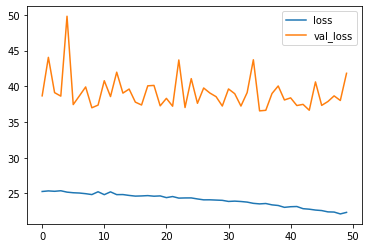

In [ ]:
# 학습 과정에서의 loss와 val_loss 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
# 예측값과 정답값을 비교
load_model = tf.keras.models.load_model("./drive/My Drive/양재 팀프로젝트/뼈 나이 측정/checkpoint_layer.h5")

predict = load_model.predict_generator(valid_generator).flatten()

compare = pd.DataFrame({"id" : valid_df["id"].tolist(),
                        "예측" : predict,
                        "정답" : valid_generator.y.flatten()})
compare.head(20)

,id,예측,정답
0,1377.png,139.706482,180.0
1,1378.png,135.087418,12.0
2,1379.png,130.101868,94.0
3,1380.png,150.143066,120.0
4,1381.png,135.029083,82.0
5,1382.png,156.638992,138.0
6,1383.png,149.848480,150.0
7,1384.png,138.103683,156.0
8,1385.png,144.997269,36.0
9,1387.png,161.120224,138.0


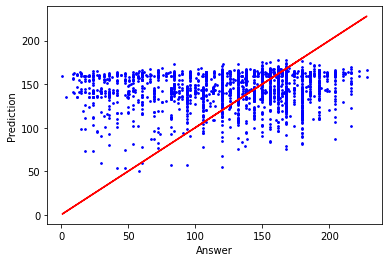

In [ ]:
# 최종 결과값과 예측값 비교 시각화
import matplotlib.pyplot as plt

plt.scatter(valid_generator.y.flatten(), predict, color='b', s=3)
plt.plot(valid_generator.y, valid_generator.y, 'r')
plt.xlabel("Answer")
plt.ylabel("Prediction")
plt.show()